## 🟢 Beginner Matplotlib Tasks

1. **Line Plot**

   - Plot `Year` vs `USA` inflation rate.
   - Add labels for `Year` (x-axis) and `Inflation Rate (%)` (y-axis).
   - Add a title.

2. **Multiple Line Plot**

   - Plot inflation of `USA`, `UK`, and `Canada` on the same chart with different colors.
   - Add a legend.

3. **Bar Chart**

   - Show the average inflation rate per country across all years as a bar chart.

---

## 🟡 Intermediate Tasks

4. **Stacked Area Chart**

   - Plot all 10 countries’ inflation data as a stacked area plot to compare their contribution over time.

5. **Scatter Plot** (FIFA dataset)

   - Plot `Overall` rating vs `Potential` for players.
   - Color points by `Preferred Foot` (Left/Right).

6. **Histogram**

   - Plot a histogram of player ages (`Age`) from the FIFA dataset.
   - Try with 10, 20, and 30 bins to see how granularity changes the chart.

---

## 🔵 Advanced Tasks

7. **Boxplot**

   - Show the distribution of `Wage` across different `Clubs`.
   - Compare top 5 clubs by average wage.

8. **Correlation Heatmap (with matplotlib only)**

   - From FIFA, compute correlation of attributes (`Dribbling`, `Finishing`, `Acceleration`, `SprintSpeed`, etc.).
   - Show it as a colored `imshow` plot.

9. **Subplots**

   - Make a 2×2 grid of plots:

     - Histogram of Ages
     - Histogram of Wages
     - Scatter of `Overall` vs `Potential`
     - Line plot of Messi’s attribute growth (`ST`, `RW`, `CAM`, etc.).

10. **Custom Annotations**

- On the inflation line chart, annotate the **highest inflation point** for USA with text and an arrow.


In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

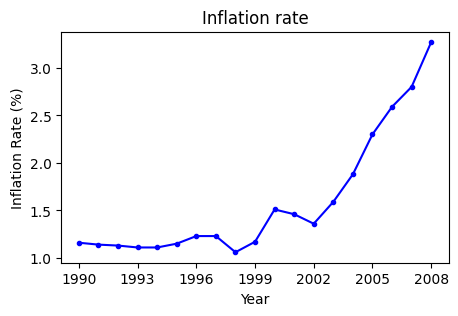

In [27]:
plt.figure(figsize=(5,3))
plt.title("Inflation rate")

gas = pd.read_csv("./data/gas_prices.csv")
gas.head()
x_ticks = gas.Year[::3] 
plt.plot(gas.Year,gas.USA,'b.-',)
plt.xticks(x_ticks)
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)") 
plt.show() 


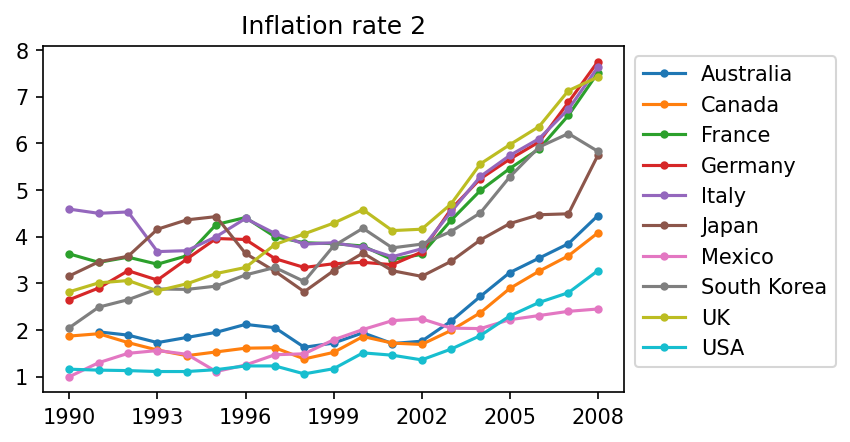

In [42]:
gas.head()
plt.figure(figsize=(5,3),dpi=150)
plt.title("Inflation rate 2") 
x_ticks = gas.Year[::3] 
 
for country in gas.drop(columns=["Year"],inplace=False):
    plt.plot(gas.Year,gas[country],marker=".",label=country)
plt.xticks(x_ticks)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<BarContainer object of 10 artists>

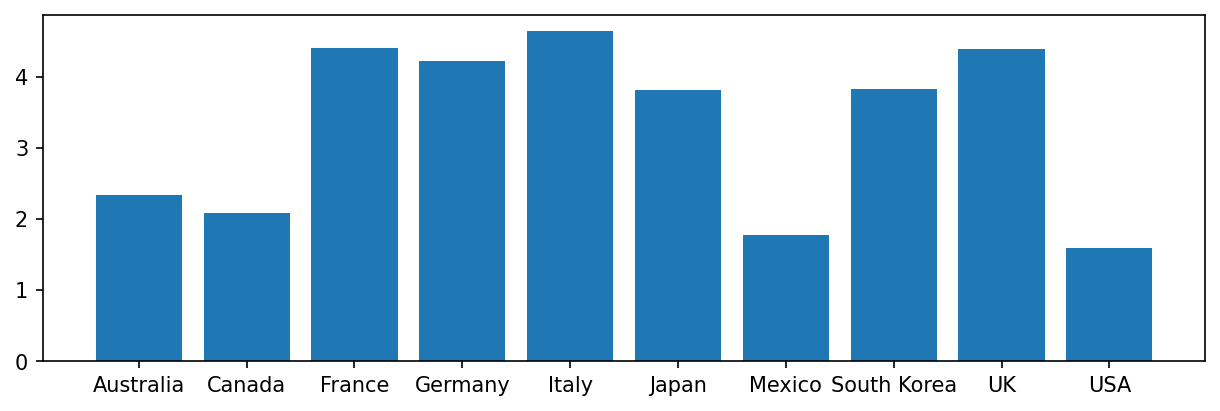

In [56]:
plt.figure(figsize=(10,3), dpi=150)
means = gas.drop(columns="Year").mean() 
plt.bar(means.index, means.values)

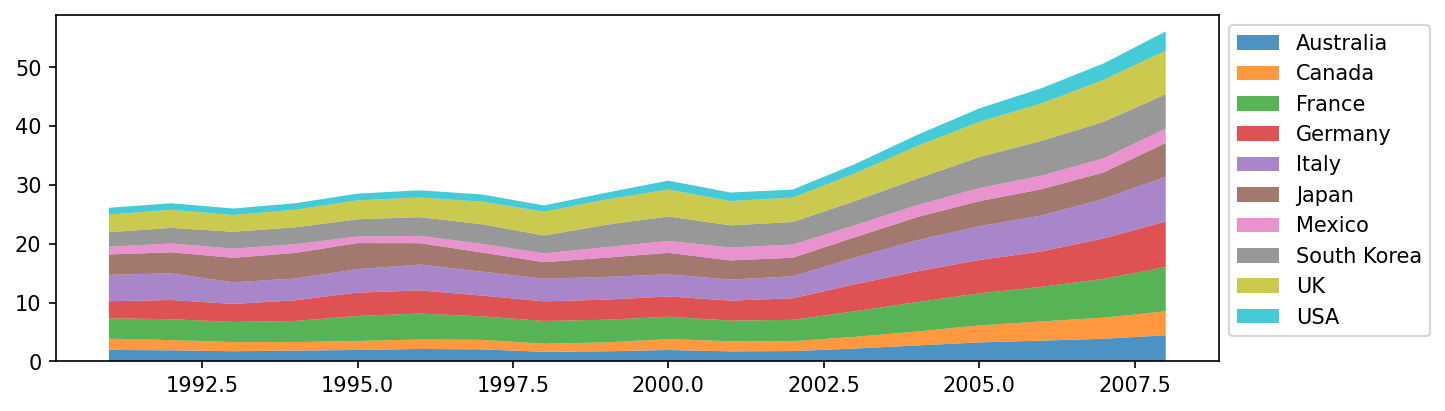

In [ ]:
plt.figure(figsize=(10,3), dpi=150)
countries = [gas[country] for country in gas.columns if country != "Year"] 
labels = [ country  for country in gas.columns if country != "Year"] 




plt.stackplot(gas.Year.tolist(), countries, alpha=0.8,labels=labels)
plt.legend(loc="upper left",bbox_to_anchor=(1,1))
plt.show()


In [69]:
fifa = pd.read_csv("./data/fifa_data.csv")

In [ ]:
fifa.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


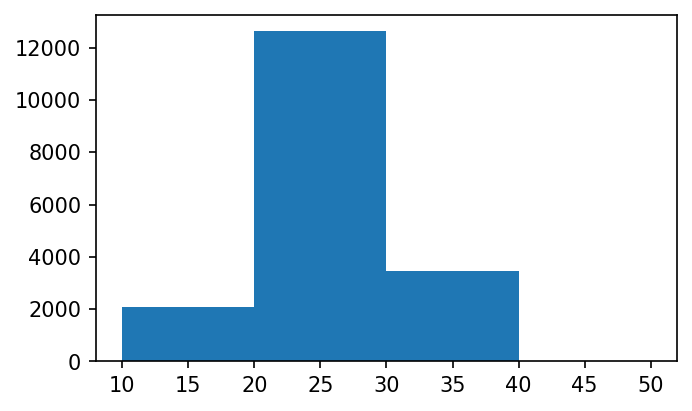

In [97]:
plt.figure(figsize=(5,3),dpi=150)
  
 
bins = [10,20,30,40,50]
plt.hist(fifa.Age,bins=bins)
plt.show() 

0      blue
1     green
2     green
3     green
4     green
      ...  
95    green
96    green
97    green
98    green
99    green
Name: color, Length: 100, dtype: object


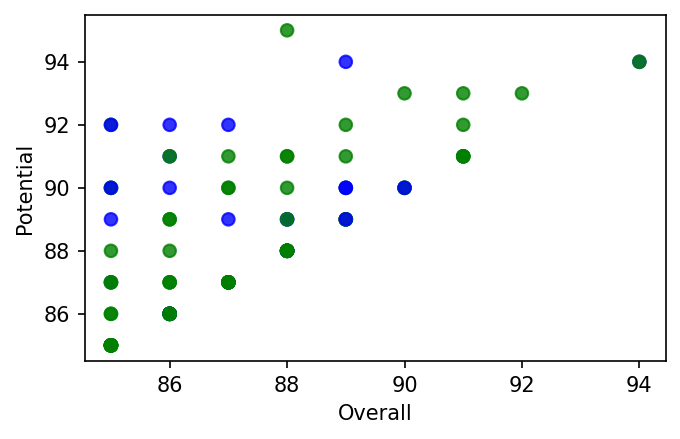

In [118]:
def map_to_colors(x):
    x['color'] = "blue" if x['Preferred Foot']=="Left" else "green"
    return x
plt.figure(figsize=(5,3),dpi=150)
sample = fifa[:100] 
colors = sample.apply(map_to_colors,axis=1).color

plt.ylabel("Potential")
plt.xlabel("Overall")
print(colors)
plt.scatter(sample.Overall ,sample.Potential ,c=colors, alpha=0.8)
plt.show() 

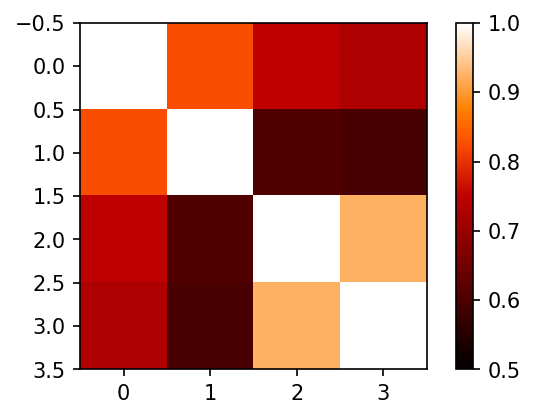

In [134]:
plt.figure(figsize=(5,3),dpi=150)
selected_features = fifa[["Dribbling","Finishing","Acceleration","SprintSpeed"]]
corr_fifa = selected_features.corr() 
plt.imshow(corr_fifa,cmap="gist_heat",vmin=0.5,vmax=1)
plt.colorbar()
plt.show()



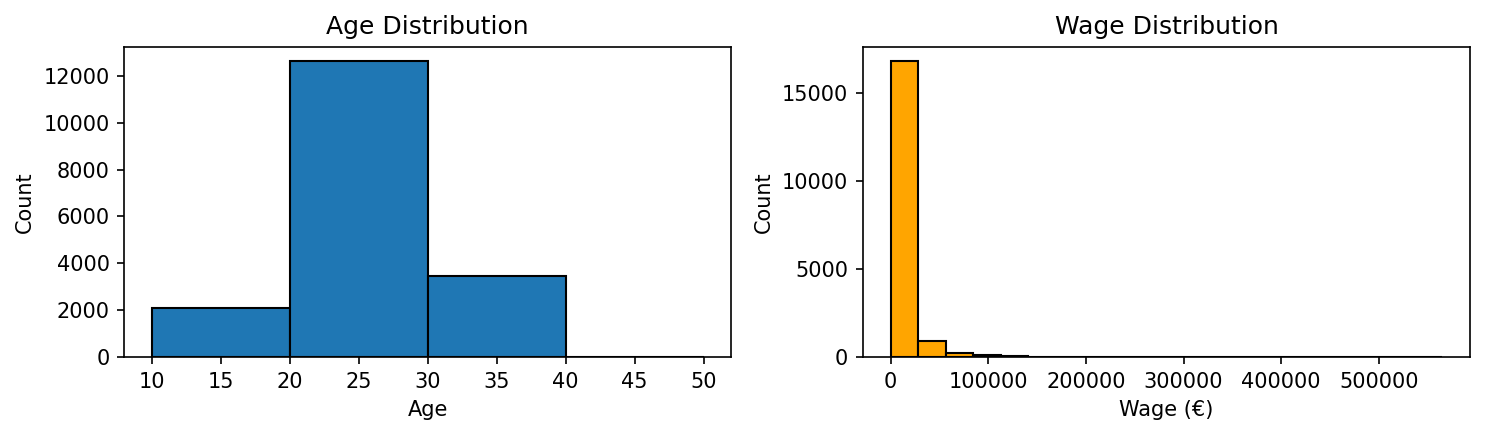

np.int64(0)

In [182]:
def normalize_wages(x):
    if not isinstance(x, str):
        return x
    
    str_x = x.replace("€", "").strip().lower()
    if "k" in str_x:
        return int(str_x.replace("k", "")) * 1000
    return int(str_x)

# make a copy to avoid modifying original
normalized_fifa = fifa.copy()
normalized_fifa['Wage'] = fifa['Wage'].apply(normalize_wages)

plt.figure(figsize=(10,3), dpi=150)

# subplot 1: Age distribution
plt.subplot(1, 2, 1)
bins = [10,20,30,40,50]
plt.hist(normalized_fifa.Age, bins=bins,  edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

# subplot 2: Wage distribution
plt.subplot(1, 2, 2)
plt.hist(normalized_fifa.Wage.dropna(), bins=20, color="orange", edgecolor="black")
plt.xlabel("Wage (€)")
plt.ylabel("Count")
plt.title("Wage Distribution")

plt.tight_layout()
plt.show()

# check min wage
normalized_fifa.Wage.min()
